In [42]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib.colors import LinearSegmentedColormap
import math
from scipy.optimize import fsolve
#plt.style.use(['science', 'notebook'])
from scipy import sparse
import matplotlib
import scipy.misc
from scipy import ndimage

def g(n,z): #g_n(z)
    s=0
    for i in range(0,int(10000)):
        s+=z**(i+1)/(i+1)**n
        
    return(s)


# Homework1.

Text(0, 0.5, '$g_{n}$')

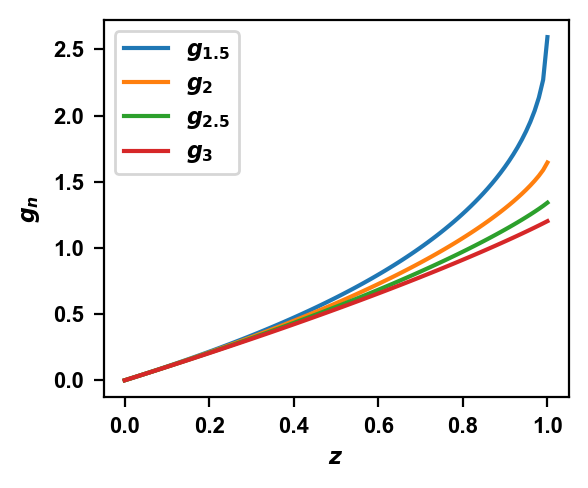

In [52]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)
f = plt.figure(figsize=(3, 2.5),dpi=200)

n=[3/2,2,5/2,3]
x=np.linspace(0,1,100)
for i in n:
    plt.plot(x,g(i,x),label="$g_{"+str(i)+"}$")
    plt.legend()
plt.xlabel("$z$")
plt.ylabel("$g_{n}$")

According to what we have worked out, we know that:

$$\lambda_{th}^{3}(T_{c})=\frac{V}{N}g_{3/2}(1) \Rightarrow \frac{T}{T_{c}}=\left(\frac{\zeta(3/2)}{g_{3/2}(z)}\right)^{2/3}$$


we need to solve it numerically for z, that is:

In [ ]:
zz=[]
T_tilde1=np.linspace(1,2.5,100)
for i in range(0,len(T_tilde1)):
    T_tilde=T_tilde1[i]
    func=lambda z: T_tilde-(g(3/2,1)/g(3/2,z))**(2/3)

# Use the numerical solver to find the roots
    z_initial_guess = 0.5
    
    zz.append(fsolve(func, z_initial_guess))

    


In order to plot the different thermodynamics properties as a functions of $\tilde{T}=T/T_{c}$, we have used the following result

$$T_{c}=\frac{h^2 N^{2/3}}{2 \pi m k_{b} V^{2/3} g_{3/2}^{2/3}(1) } \Rightarrow \tilde{V}=\frac{\tilde{T}^{3/2}N}{g_{3/2}(1)}$$

with  $\tilde{V}=V/\lambda_{th}^3$ and $\tilde{T}=T/T_{c}$

# Plot $N_{0}/N$ vs $\frac{T}{T_{c}}$  and $N_{e}/N$ vs  $\frac{T}{T_{c}}$ 

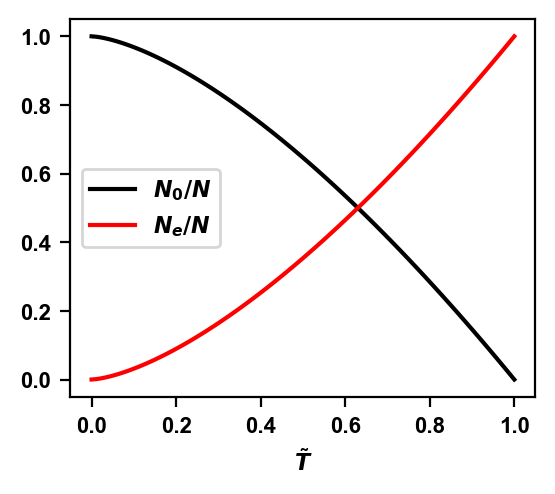

In [48]:
T=np.linspace(0,1,100) # T tiltde
N0_N=1-T**(3/2)
Ne_N=T**(3/2)

def Ne_N1(T,z):
    N=[]
    for i in range(len(T)):
        N.append(T[i]**(3/2)*g(3/2,z[i][0])/g(3/2,1))
        
    return N


f = plt.figure(figsize=(3, 2.5),dpi=200)
plt.plot(T,N0_N,'k',label='$N_{0}/N$')
plt.plot(T,Ne_N,'r',label='$N_{e}/N$')
plt.xlabel(r'$\tilde{T}$')
plt.legend()
#plt.plot(T,Ne_N(T,zz))


# Heat capacity

No handles with labels found to put in legend.


Text(0, 0.5, '$C_{V}/Nk_{b}$')

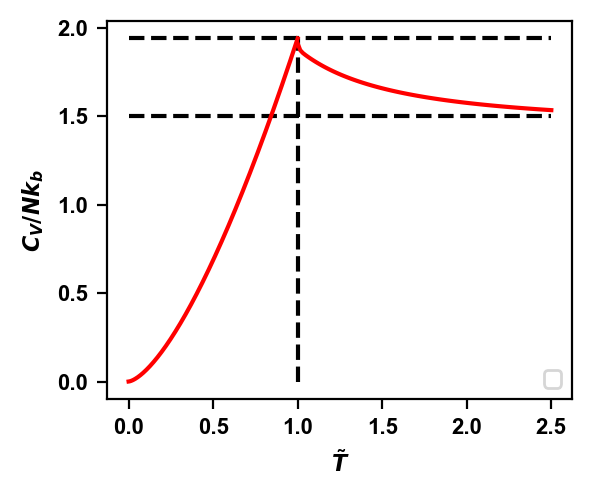

In [45]:
T=np.linspace(0,1,1000)

gg=1.34
g_5=2.612
heat=15/4*T**(3/2)*g(5/2,1)/g(3/2,1)

def heat1(T,z):
    h=[]
    for i in range(len(T)):
        h.append(15/4*T[i]**(3/2)*g(5/2,z[i][0])/g(3/2,1)-9/4*g(3/2,z[i][0])/g(1/2,z[i][0]))
        
    return h

f = plt.figure(figsize=(3, 2.5),dpi=200)
plt.xlabel(r'$\tilde{T}$')
plt.legend()
T=np.linspace(0,2.5,1000)
plt.plot(T,np.ones(len(T))*max(heat),'--k')
plt.plot(T,np.ones(len(T))*1.5,'--k')
T=np.linspace(0,1,1000)
plt.plot(np.ones(len(T))*1,heat,'--k')
plt.plot(T,heat,'r')
T_tilde1=np.linspace(1,2.5,100)
plt.plot(T_tilde1,heat1(T_tilde1,zz),'r')
plt.ylabel(r'$C_{V}/Nk_{b}$')

# Homework2

In [ ]:
def energies(alpha,k1,k2,k3):
    return alpha**2*(k1**2+k**2+k**3)

def NN()

# Homework 3

# Partition function.

$$\zeta=\left(\frac{\sqrt{\pi}}{2 \alpha_l}-\frac{1}{2}\right)\sum_{k}\text{exp}\left(-\frac{\alpha_{t}^2}{\pi^2} \tilde{k}^2 \right)$$

and the partition function $$ Z= \zeta^{N}/N!$$
The parameters that are used in the simulation are: $T=300$ $K$, the lenght of the outer and inner square are $21$ $nm$ and $13$ $nm$ respectively, $\alpha_l=1$, $\alpha_t=0.005$. 

In [4]:
def Particion(energia,N=1):  #Metodo 1 para calcular la función partición, suma sobre todas las energía posibles incluyendo las repetidas21
    energias=np.unique(energia, return_counts=True)
    Z = 0
    for i in range(len(energias[0])):
        Z+= energias[1][i]* np.exp(-2*energias[0][i]**2*0.005**2/np.pi**2) 
    return ((np.sqrt(np.pi)/2-1/2)*Z)**N/math.factorial(N)


def n(ee,ev,TE,NN): 
    nn=0
    
    for i in range(len(ee)):
        evn=ev.T[i].reshape((NN,NN))
        nn+=np.exp(-ee[i]/TE)*evn**2
    
    nn=nn/Parti
    return nn


def F(ee,T,NN):
    return -T*np.log(Parti)
    
def Emedia(Energias, T): #Cálculo de la energía media teniendo en cuenta la degenerancia de la energía y usando la función Particion2
    Em = 0 #Energía media
    energias=np.unique(Energias, return_counts=True)
    for i in range(len(energias[0])):
        Em += energias[0][i] *energias[1][i] * np.exp(-energias[0][i]/T) 
    return Em/Parti


def schrodinger(V,N,k): # Find schordinger eigenvectors and eigenvalues
    diag = np.ones([N])
    diags = np.array([diag, -2*diag, diag])
    D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
    T = -1/2 * sparse.kronsum(D,D)
    U = sparse.diags(V.reshape(N**2), (0))
    H = T+U
    eigenvalues, eigenvectors = eigsh(H, k, which='SM')
    
    return eigenvalues, eigenvectors


def get_e(n,N):
    return eigenvectors.T[n].reshape((N,N))

In [58]:
N=10
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
diags

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [5]:
Li=13

def rect2D(x,y):
    n=len(x)
    m=len(y)
    R1=np.zeros([1,n])
    R2=np.zeros([1,n])
    R1[0,x>-Li/2]=1
    R2[0,x<Li/2]=1
    Rx=R1*R2
    R1=np.zeros([1,m])
    R2=np.zeros([1,m])
    R1[0,y>-Li/2]=1
    R2[0,y<Li/2]=1
    Ry=R1*R2
    return Rx.T@Ry


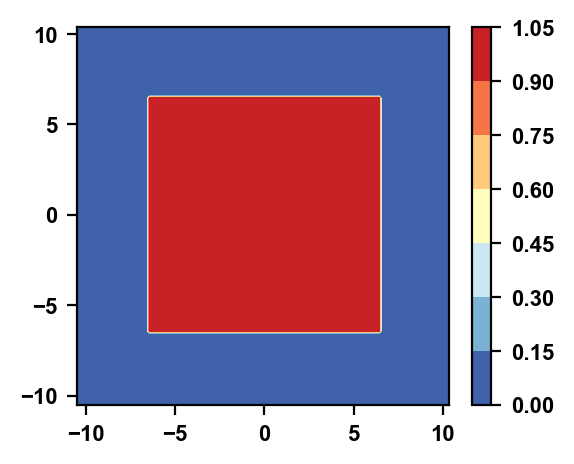

In [6]:
L1=21 #Longitud mayor
M=150 # Número de muestras 
dx= L1/M
x1=np.linspace(-L1/2, L1/2-dx,int(M))
y1=np.linspace(-L1/2, L1/2-dx,int(M))
xx1, yy1= np.meshgrid(x1,y1)

u1=np.abs(rect2D(x1,y1)) #Intensidad en el plano fuente.

#Graficos
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)
f = plt.figure(figsize=(3, 2.5),dpi=200)

plt.contourf(xx1, yy1, u1,cmap='RdYlBu_r')
plt.colorbar()

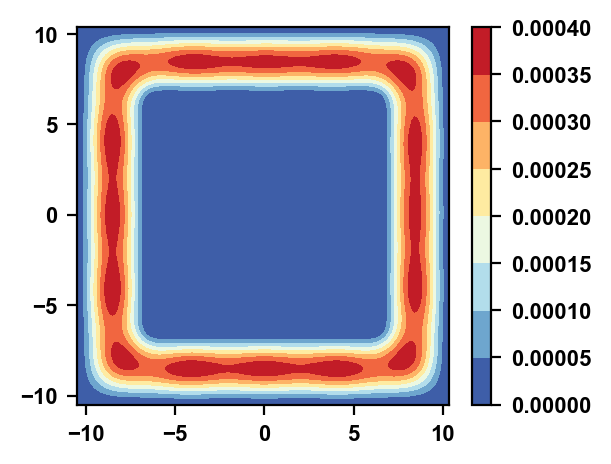

In [7]:
EE,EV=schrodinger(u1,M,15)
#Graficos
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)
f = plt.figure(figsize=(3, 2.5),dpi=200)
Parti= Particion(EE,N=1)
density=n(EE, EV, 300,M)
plt.contourf(xx1, yy1,density ,cmap='RdYlBu_r')
#plt.contour(xx1, yy1,V )
plt.colorbar()

# Square.

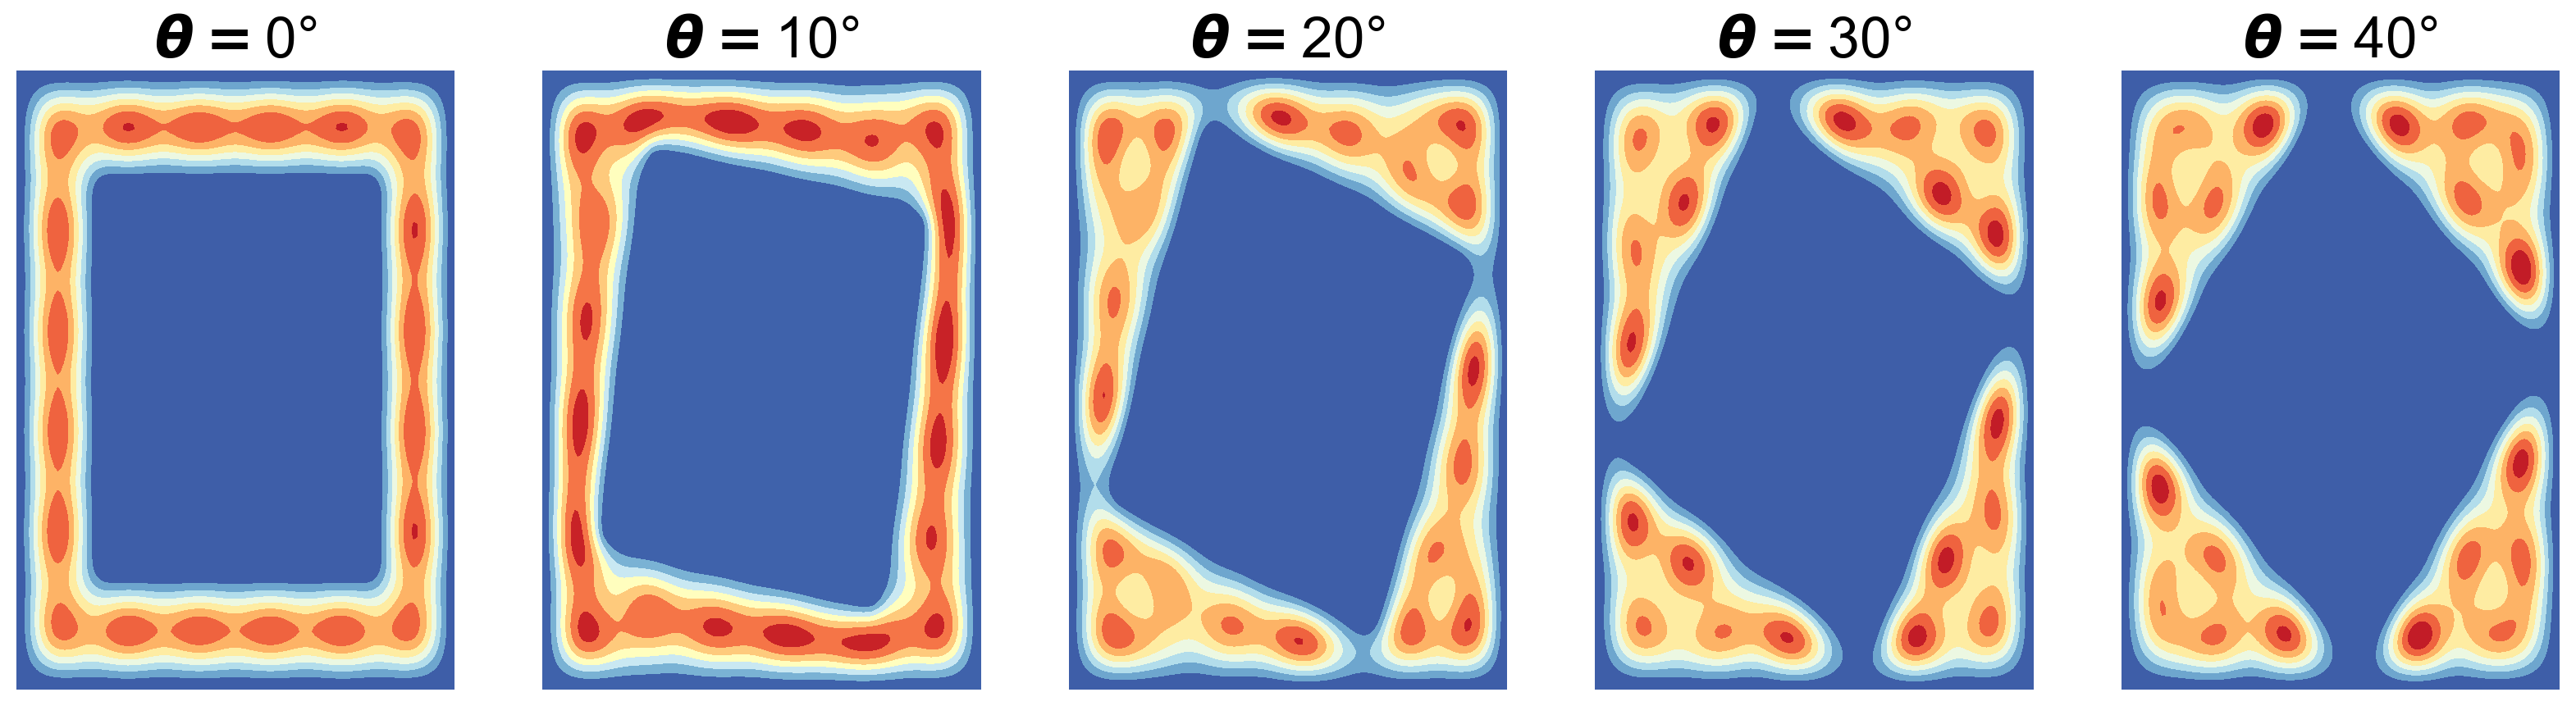

In [8]:
angle=np.arange(0,90,0.1)
helm=[]
U=[]
S=[]
ang=[0,10,25,45]
plt.figure(figsize=(20, 5),dpi=200)
img=u1
ang=[0,10,25,45]
for degree in range(0,5):
    
    plt.subplot(151+degree)
    rotated_img = ndimage.rotate(img, degree*10,reshape=False)
    Parti= Particion(EE,N=5)
    EE,EV=schrodinger(rotated_img,M,20) # Se debe crear una forma de rotar el cuadrado
    density=n(EE, EV, 300,M)
    plt.contourf(xx1, yy1,density ,cmap='RdYlBu_r')
    plt.axis('off')
    plt.title(r'$\theta=$'+str(degree*10)+'°',fontsize=25)

plt.show()



In [9]:
angle=np.arange(0,90,9)
helm=[]
U=[]
S=[]
for i in range(len(angle)):
    
    rotated_img = ndimage.rotate(img,angle[i],reshape=False)
    EE,EV=schrodinger(rotated_img,M,15) # Se debe crear una forma de rotar el cuadrado
    Parti= Particion(EE,N=1)
    helm.append(F(EE,300,M))
    U.append(Emedia(EE, 300))
    S.append(1/300.*(U[i]-helm[i]))
    

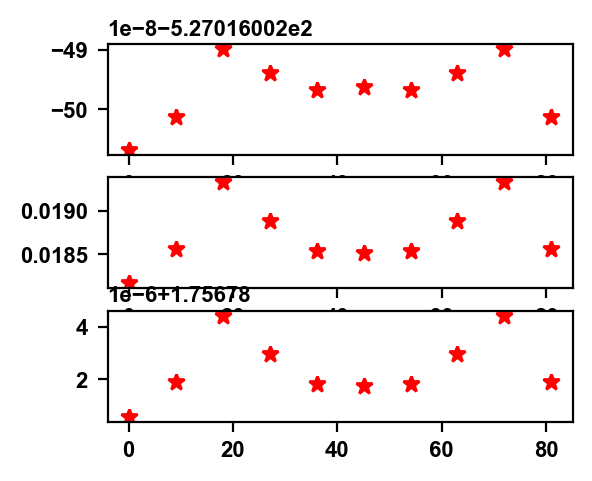

In [12]:
#Graficos
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)
f = plt.figure(figsize=(3, 2.5),dpi=200)

plt.subplot(311)
plt.plot(angle,helm,'*r')


plt.subplot(312)
plt.plot(angle,U,'*r')


plt.subplot(313)
plt.plot(angle,S,'*r')

# Rectangle

In [13]:
Li=13


def rect2D(x,y):
    n=len(x)
    m=len(y)
    R1=np.zeros([1,n])
    R2=np.zeros([1,n])
    R1[0,x>-Li/8]=1
    R2[0,x<Li/8]=1
    Rx=R1*R2
    R1=np.zeros([1,m])
    R2=np.zeros([1,m])
    R1[0,y>-Li/4]=1
    R2[0,y<Li/4]=1
    Ry=R1*R2
    return Rx.T@Ry



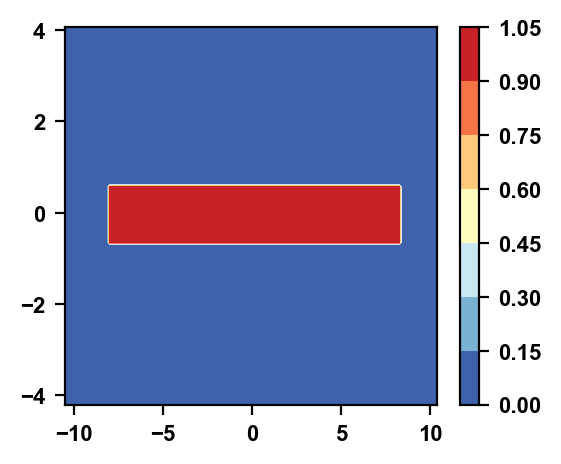

In [14]:
L1=21 #Longitud mayor
M=150 # Número de muestras 
dx= L1/M
x1=np.linspace(-L1/2, L1/2-dx,int(M))
y1=np.linspace(-L1/5, L1/5-dx,int(M))
xx1, yy1= np.meshgrid(x1,y1)

u1=np.abs(rect2D(x1,y1)) #Intensidad en el plano fuente.

#Graficos
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)
f = plt.figure(figsize=(3, 2.5),dpi=200)

plt.contourf(xx1, yy1, u1,cmap='RdYlBu_r')
plt.colorbar()

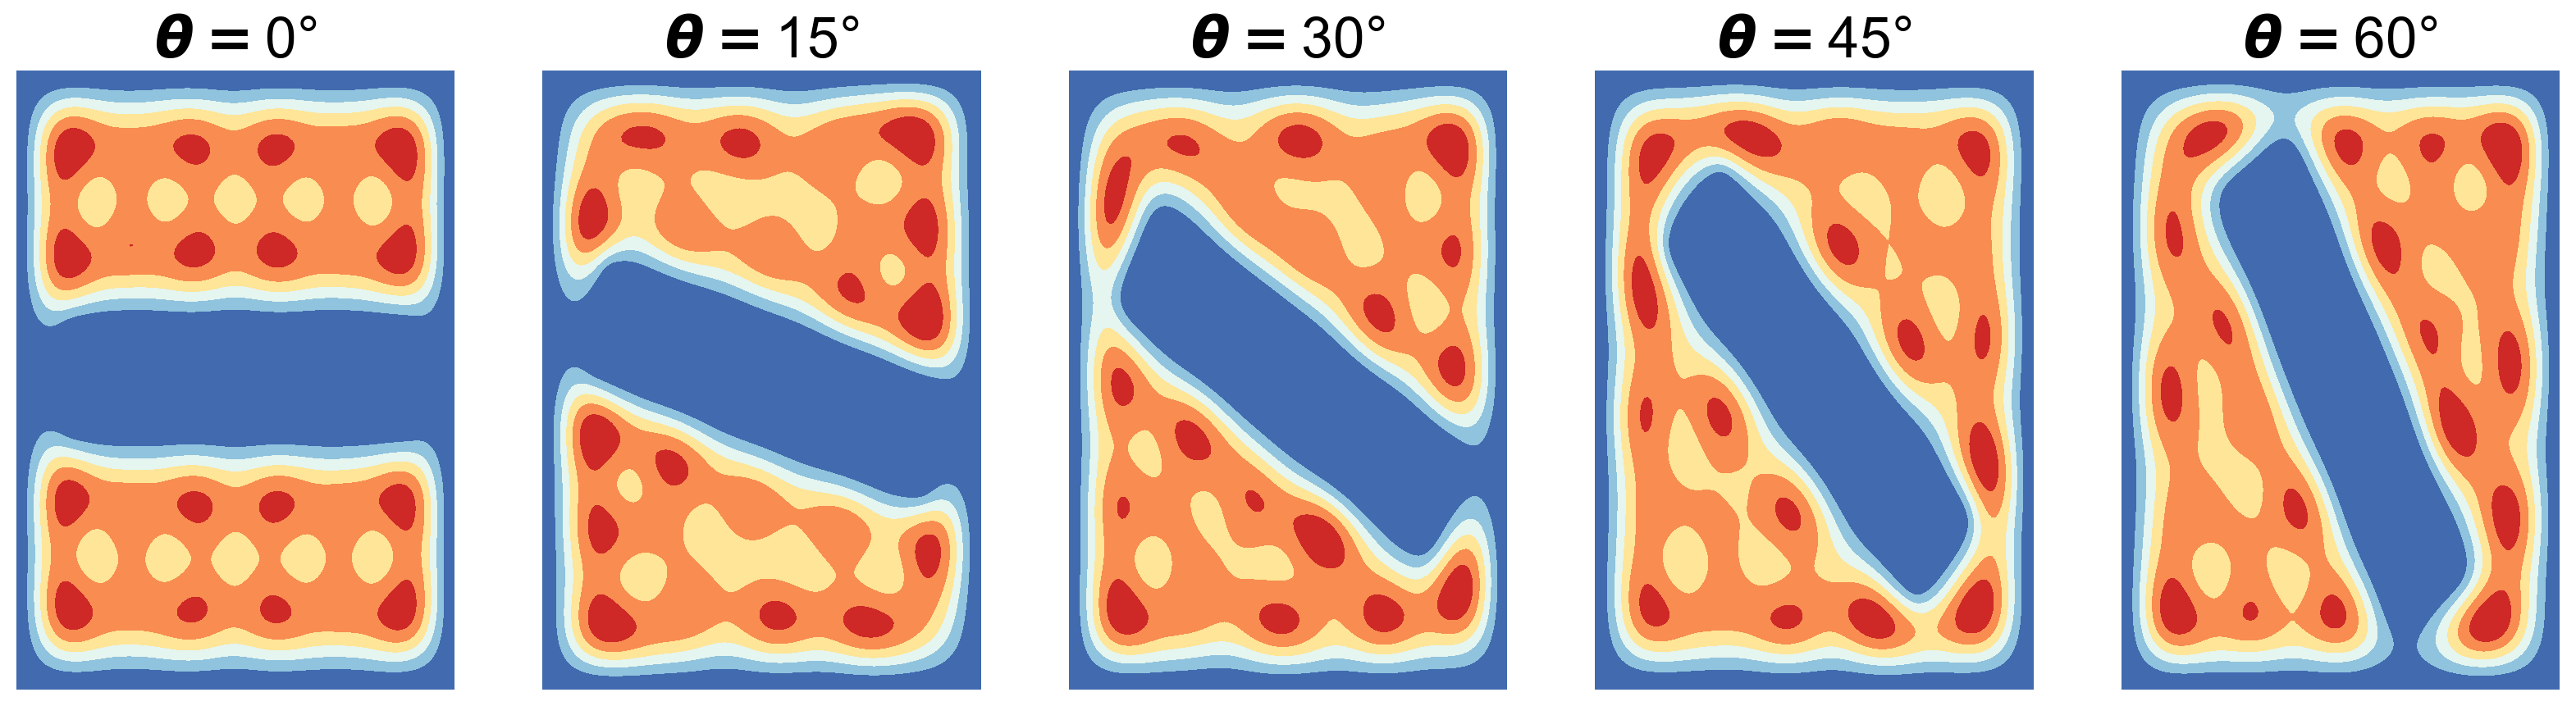

In [18]:
angle=np.arange(0,90,0.1)
helm=[]
U=[]
S=[]
ang=[0,10,25,45]
plt.figure(figsize=(20, 5),dpi=200)
img=u1
ang=[0,10,25,45]
for degree in range(0,5):
    
    plt.subplot(151+degree)
    rotated_img = ndimage.rotate(img, degree*15,reshape=False)
    Parti= Particion(EE,N=5)
    EE,EV=schrodinger(rotated_img,M,20) # Se debe crear una forma de rotar el cuadrado
    density=n(EE, EV, 300,M)
    plt.contourf(xx1, yy1,density ,cmap='RdYlBu_r')
    plt.axis('off')
    plt.title(r'$\theta=$'+str(degree*15)+'°',fontsize=25)

plt.show()

